In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import time

#Set Default option
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_rows = 3000

In [5]:
## Libraries for ata preparation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Support Vector Machine Libraries
from sklearn import svm
## Decision Tree Libraries
from sklearn import tree
## Adaboost Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## Library for plotting
import matplotlib.pyplot as plt
## Performance metrics libraries
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
sgemm_product = pd.read_csv(r'D:\Masters\Universities\UTD\Academic\Spring 2020\BUAN 6341\Assignments\Assignment 1\sgemm_product_dataset\sgemm_product.csv')
sgemm_product.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [11]:
sgemm_product['y']=sgemm_product[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)']].mean(axis=1)
sgemm_product

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),y
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525


In [6]:
y_hat=np.log(sgemm_product['y'])
y_mean=np.log(sgemm_product['y']).mean()
print("mean of y after taking log is coming to be",y_mean)
    
sgemm_product["y_sigmoid"]=np.log(sgemm_product['y']).apply(lambda y_hat : 1 if y_hat> 4.623067968587768 else 0)

mean of y after taking log is coming to be 4.623067968587768


In [7]:
sgemm_product_log=sgemm_product[sgemm_product['y']<=1000]
sgemm_product_log

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),y,y_sigmoid
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050,0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375,0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175,0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350,0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600,0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525,0


In [8]:
sgemm_product_log['y_sigmoid'].value_counts()

0    141349
1     91693
Name: y_sigmoid, dtype: int64

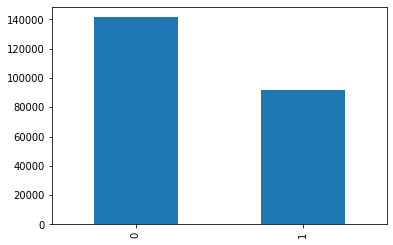

In [9]:
sgemm_product_log['y_sigmoid'].value_counts().plot(kind='bar')

In [10]:
sgemm_product_log=sgemm_product_log.drop(['Run1 (ms)', 'Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','y'], axis=1)
sgemm_product_log

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y_sigmoid
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,0


In [0]:
data=sgemm_product_log

In [0]:
#Resampling of data 
data=data.sample(4000,replace=True)

0    2452
1    1548
Name: y_sigmoid, dtype: int64


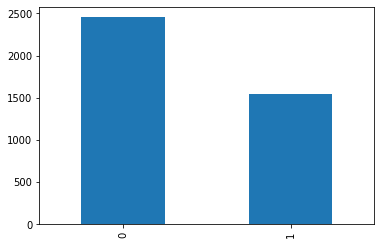

In [13]:
print(data['y_sigmoid'].value_counts())
data['y_sigmoid'].value_counts().plot(kind='bar')

In [0]:
#Independent Variables
X = data.drop('y_sigmoid', axis=1)
y=data['y_sigmoid']

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
#Splitting data into train and test set with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [0]:
#Scaling the independent features
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
def validation(clf,X_train, y_train):
    scores = cross_validate(clf, X_train, y_train,cv=10, return_train_score=True)
    return scores

## Linear Kernel

In [0]:
model_linear = SVC(kernel='linear', C=0.1)
score_1_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=0.5)
score_2_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=1)
score_3_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=5)
score_4_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=10)
score_5_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=50)
score_6_linear = validation(model_linear, X_train, y_train)

In [0]:
score_1_linear=pd.DataFrame.from_dict(score_1_linear)
score_2_linear=pd.DataFrame.from_dict(score_2_linear)
score_3_linear=pd.DataFrame.from_dict(score_3_linear)
score_4_linear=pd.DataFrame.from_dict(score_4_linear)
score_5_linear=pd.DataFrame.from_dict(score_5_linear)
score_6_linear=pd.DataFrame.from_dict(score_6_linear)

In [55]:
score_1_linear

,fit_time,score_time,test_score,train_score
0,0.073533,0.004623,0.903125,0.907986
1,0.080903,0.004585,0.921875,0.911806
2,0.069925,0.004476,0.937500,0.912153
3,0.070774,0.004428,0.903125,0.908333
4,0.067477,0.004852,0.893750,0.906944
5,0.080537,0.004269,0.893750,0.911458
6,0.078079,0.004213,0.909375,0.911806
7,0.078868,0.004301,0.915625,0.910417
8,0.070405,0.004527,0.900000,0.913542
9,0.084881,0.004488,0.915625,0.909375


In [0]:
s1_linear_train=[score_1_linear[['train_score']].mean(axis=0),
                score_2_linear[['train_score']].mean(axis=0),score_3_linear[['train_score']].mean(axis=0),
                score_4_linear[['train_score']].mean(axis=0),score_5_linear[['train_score']].mean(axis=0),score_6_linear[['train_score']].mean(axis=0)]  

s1_linear_test=[score_1_linear[['test_score']].mean(axis=0),
                score_2_linear[['test_score']].mean(axis=0),score_3_linear[['test_score']].mean(axis=0),
                score_4_linear[['test_score']].mean(axis=0),score_5_linear[['test_score']].mean(axis=0),score_6_linear[['test_score']].mean(axis=0)]  

In [0]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
def train_cv_plot(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train')
    plt.plot(c,s1_linear_test,label='cv')
    plt.xlabel("C(Regularization Parameter)")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.title("Train and CrossValidation accuracy for SVM as a function of C for SGM GPU")

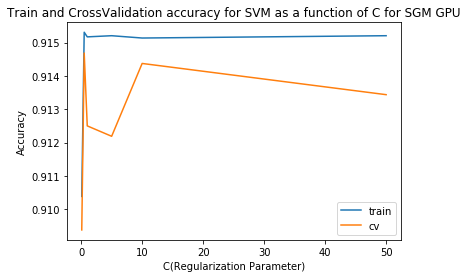

In [57]:
c=[0.1,0.5,1,5,10,50]
train_cv_plot(c,s1_linear_train,s1_linear_test)

## Rbf Kernel

In [0]:
model_linear = SVC(kernel='rbf', C=0.01)
score_1_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=0.1)
score_2_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=0.5)
score_3_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=1)
score_4_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=5)
score_5_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=50)
score_6_rbf = validation(model_linear, X_train, y_train)

In [0]:
score_1_rbf=pd.DataFrame.from_dict(score_1_rbf)
score_2_rbf=pd.DataFrame.from_dict(score_2_rbf)
score_3_rbf=pd.DataFrame.from_dict(score_3_rbf)
score_4_rbf=pd.DataFrame.from_dict(score_4_rbf)
score_5_rbf=pd.DataFrame.from_dict(score_5_rbf)
score_6_rbf=pd.DataFrame.from_dict(score_6_rbf)

In [27]:
score_2_rbf

,fit_time,score_time,test_score,train_score
0,0.222813,0.018833,0.890625,0.902431
1,0.223175,0.018781,0.900000,0.896528
2,0.217668,0.019013,0.909375,0.903472
3,0.241998,0.018785,0.903125,0.906597
4,0.216110,0.018558,0.875000,0.905903
5,0.217235,0.018697,0.881250,0.909722
6,0.214158,0.019121,0.862500,0.903819
7,0.217304,0.018586,0.900000,0.905208
8,0.216288,0.018530,0.884375,0.904514
9,0.220226,0.018526,0.890625,0.905208


In [0]:
s1_rbf_train=[score_1_rbf[['train_score']].mean(axis=0),score_2_rbf[['train_score']].mean(axis=0),
                score_3_rbf[['train_score']].mean(axis=0),score_4_rbf[['train_score']].mean(axis=0),
                score_5_rbf[['train_score']].mean(axis=0),score_6_rbf[['train_score']].mean(axis=0)]  

s1_rbf_test=[score_1_rbf[['test_score']].mean(axis=0),score_2_rbf[['test_score']].mean(axis=0),
                score_3_rbf[['test_score']].mean(axis=0),score_4_rbf[['test_score']].mean(axis=0),
                score_5_rbf[['test_score']].mean(axis=0),score_6_rbf[['test_score']].mean(axis=0)]  

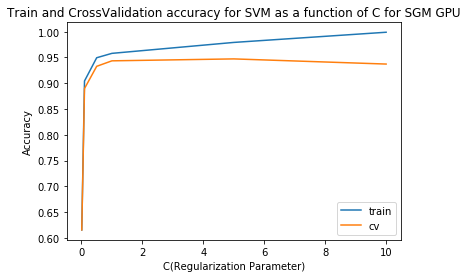

In [58]:
c=[0.01,0.1,0.5,1,5,10]
train_cv_plot(c,s1_rbf_train,s1_rbf_test)

## Sigmoid Kernel

In [0]:
model_linear = SVC(kernel='sigmoid', C=0.5)
score_1_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=1)
score_2_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=5)
score_3_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=10)
score_4_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=50)
score_5_sig = validation(model_linear, X_train, y_train)

In [0]:
score_1_sig=pd.DataFrame.from_dict(score_1_sig)
score_2_sig=pd.DataFrame.from_dict(score_2_sig)
score_3_sig=pd.DataFrame.from_dict(score_3_sig)
score_4_sig=pd.DataFrame.from_dict(score_4_sig)
score_5_sig=pd.DataFrame.from_dict(score_5_sig)

In [60]:
score_1_sig

,fit_time,score_time,test_score,train_score
0,0.189840,0.015081,0.868750,0.847222
1,0.185344,0.015857,0.875000,0.848958
2,0.197507,0.014898,0.856250,0.845139
3,0.190100,0.014914,0.884375,0.845833
4,0.191601,0.015010,0.834375,0.850000
5,0.179781,0.014639,0.843750,0.848264
6,0.183639,0.014825,0.865625,0.849653
7,0.185256,0.014590,0.865625,0.845486
8,0.190679,0.015061,0.862500,0.853125
9,0.185576,0.014602,0.884375,0.848611


In [0]:
s1_sig_train=[
                score_1_sig[['train_score']].mean(axis=0),score_2_sig[['train_score']].mean(axis=0),
                score_3_sig[['train_score']].mean(axis=0),score_4_sig[['train_score']].mean(axis=0),score_5_sig[['train_score']].mean(axis=0)]  

s1_sig_test=[
                score_1_sig[['test_score']].mean(axis=0),score_2_sig[['test_score']].mean(axis=0),
                score_3_sig[['test_score']].mean(axis=0),score_4_sig[['test_score']].mean(axis=0),score_5_sig[['test_score']].mean(axis=0)]  

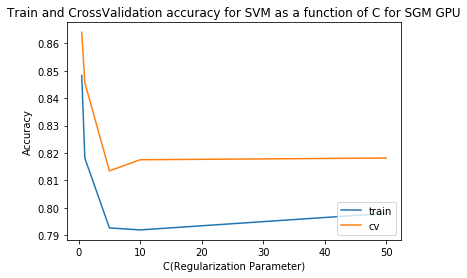

In [59]:
c=[0.5,1,5,10,50]
train_cv_plot(c,s1_sig_train,s1_sig_test)

#### Fitting the functions on the complete training set with best parameters
## SVM Functions 

In [34]:

clf_linear_1 = svm.SVC(kernel='linear', C=1)
clf_linear_1.fit(X_train,y_train)

clf_rbf_1 = svm.SVC(kernel='rbf', C=1)
clf_rbf_1.fit(X_train,y_train)

clf_sigmoid_1 = svm.SVC(kernel='sigmoid', C=0.5)
clf_sigmoid_1.fit(X_train,y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_linear=clf_linear_1.predict(X_test)
y_pred_rbf=clf_rbf_1.predict(X_test)
y_pred_sigmoid=clf_sigmoid_1.predict(X_test)

In [36]:
## Classification report for SVM-Linear
print(confusion_matrix(y_test,y_pred_linear))  
print(classification_report(y_test,y_pred_linear))
print(accuracy_score(y_test,y_pred_linear))

[[441  42]
 [ 45 272]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       483
           1       0.87      0.86      0.86       317

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

0.89125


In [37]:
## Classification report for SVM-rbf
print(confusion_matrix(y_test,y_pred_rbf))  
print(classification_report(y_test,y_pred_rbf))
print(accuracy_score(y_test,y_pred_rbf))

[[471  12]
 [ 35 282]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       483
           1       0.96      0.89      0.92       317

    accuracy                           0.94       800
   macro avg       0.95      0.93      0.94       800
weighted avg       0.94      0.94      0.94       800

0.94125


In [38]:
## Classification report for SVM-sigmoid
print(confusion_matrix(y_test,y_pred_sigmoid))  
print(classification_report(y_test,y_pred_sigmoid))
print(accuracy_score(y_test,y_pred_sigmoid))

[[415  68]
 [ 59 258]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       483
           1       0.79      0.81      0.80       317

    accuracy                           0.84       800
   macro avg       0.83      0.84      0.83       800
weighted avg       0.84      0.84      0.84       800

0.84125


# Decision Tree

In [0]:
def train_using_gini(X_train, y_train, depth): 
  
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,max_depth=depth) 
  
    clf_gini.fit(X_train, y_train) #training
    return clf_gini 

In [0]:

def prediction(X_test, clf_object): 
  
    y_pred_tree = clf_object.predict(X_test)  
    return y_pred_tree

In [0]:
def accuracy(y_test, y_pred): 
      
    print("Confusion Matrix is: ",confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy Score is: ", accuracy_score(y_test,y_pred)*100) 
      
    print("Classsification Report is: ", classification_report(y_test, y_pred))

In [42]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini.fit(X_train, y_train) 
y_pred_tree = prediction(X_test, clf_gini)
accuracy(y_test, y_pred_tree)

Confusion Matrix is:  [[466  17]
 [ 11 306]]
Accuracy Score is:  96.5
Classsification Report is:                precision    recall  f1-score   support

           0       0.98      0.96      0.97       483
           1       0.95      0.97      0.96       317

    accuracy                           0.96       800
   macro avg       0.96      0.97      0.96       800
weighted avg       0.97      0.96      0.97       800



In [43]:
print(clf_gini.tree_.max_depth)

13


In [44]:
print("Accuracy on training set:",clf_gini.score(X_train, y_train)*100)
print("Accuracy on test set:",clf_gini.score(X_test, y_test)*100)

Accuracy on training set: 100.0
Accuracy on test set: 96.5


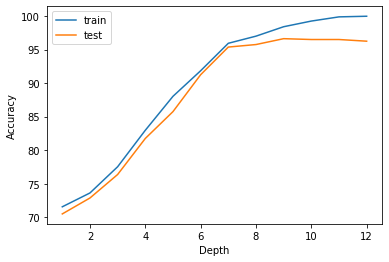

In [45]:
test_accuracy = []
train_accuracy = []
depth = []
for i in range(1,clf_gini.tree_.max_depth):
    clf_gini_1 = train_using_gini(X_train, y_train, i)
    y_pred_tree_test = prediction(X_test, clf_gini_1)
    y_pred_tree_train = prediction(X_train, clf_gini_1)
    test_accuracy.append(accuracy_score(y_test,y_pred_tree_test)*100)
    train_accuracy.append(accuracy_score(y_train,y_pred_tree_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,train_accuracy, label='train')
plt.plot(depth,test_accuracy, label='test')
plt.legend(loc='best')
plt.show()

# AdaBoost

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [0]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)

clf.predict(X_test)

clf.score(X_test, y_test)

0.8525

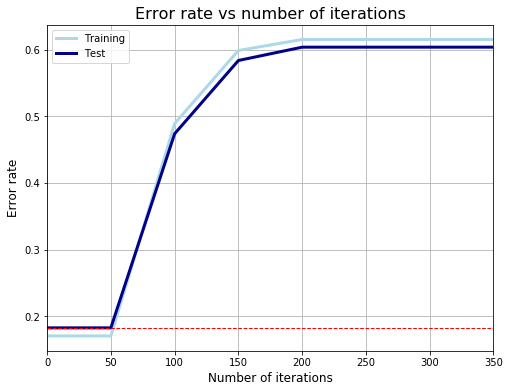

In [47]:
""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    print ('Error rate: Training: %.4f - Test: %.4f', err)

""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
    
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)

""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

""" MAIN SCRIPT ============================================================="""
if __name__ == '__main__':
    
    # Read data
#     x, y = make_hastie_10_2()
#     df = pd.DataFrame(x)
#     df['Y'] = y

    # Split into training and test set
#     train, test = train_test_split(df, test_size = 0.2)
#     X_train, Y_train = train.ix[:,:-1], train.ix[:,-1]
#     X_test, Y_test = test.ix[:,:-1], test.ix[:,-1]
    
    # Fit a simple decision tree first
    clf_tree = DecisionTreeClassifier(max_depth = 4, random_state = 1)
    er_tree = generic_clf(y_train, X_train, y_test, X_test, clf_tree)
    
    # Fit Adaboost classifier using a decision tree as base estimator
    # Test with different number of iterations
    er_train, er_test = [er_tree[0]], [er_tree[1]]
    x_range = range(10, 50, 10)
    for i in [1,5,10,20,40,80,200]:    
        er_i = adaboost_clf(y_train, X_train, y_test, X_test, i, clf_tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
    # Compare error rate vs number of iterations
    plot_error_rate(er_train, er_test)

In [0]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [49]:
regr_2.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [0]:
ErrorRate_train=[]
ErrorRate_test=[]
x_range=range(10,150,5)
for i in x_range:
    regr_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=i, random_state=23)
    regr_2.fit(X_train,y_train)
    pred_train=regr_2.predict(X_train)
    pred_test=regr_2.predict(X_test)
    error_rate_train=sum(pred_train != y_train) / float(len(y_train))
    error_rate_test=sum(pred_test != y_test) / float(len(y_test))
    ErrorRate_train.append(error_rate_train)
    ErrorRate_test.append(error_rate_test)

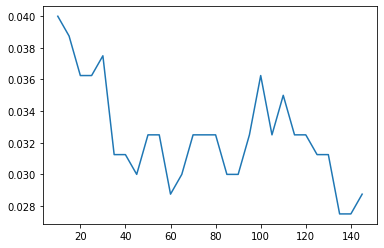

In [63]:
# Plotting train and test error rates
plt.plot(x_range,ErrorRate_test)